# Exercise 3: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).

### 1: What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

- Mean: The average number of connections (in or out). A high mean indicates that, on average, nodes are well-connected. In your network, a high mean in-degree could mean many artists are often referenced, while a high mean out-degree indicates active collaboration.

- Median: The middle value of connections. If the median is much lower than the mean, it shows most nodes have few connections, but a few outliers are highly connected, typical in real-world networks.

- Mode: The most common degree value. If the mode is low, most nodes have few connections, which is common when only a few key nodes dominate the network.

- Minimum: The least connected node(s). These nodes are isolated or rarely referenced.

- Maximum: The most connected node(s). These are key players in the network, either highly referenced (in-degree) or very active collaborators (out-degree).

In summary, these values help identify influential nodes and general patterns of connectivity in the network.

In [5]:
import os
import pickle

# Define the relative path to the pickle file
relative_folder_path = "shared"
file_name = "performer_network.pkl"
file_path = os.path.join(relative_folder_path, file_name)

# Load the graph from the specified file path
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
else:
    print(f"File not found: {file_path}")

# 2: Let's also look at the exponent of the degree distribution
### Use powerlaw.Fit(degree).alpha for fitting

Calculating best minimal value for power law fit
Power-law exponent (alpha): 2.9299949861024266


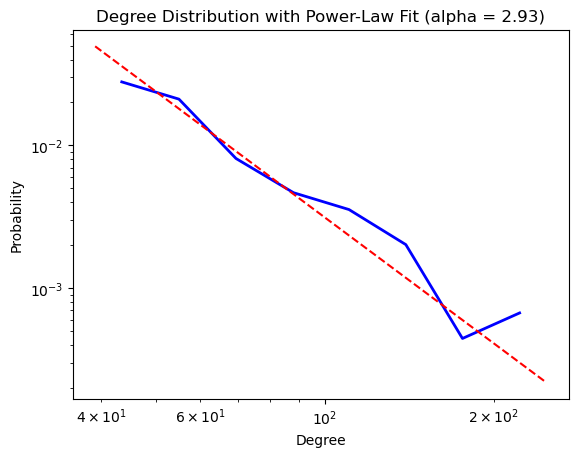

In [4]:
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt

# Step 1: Get the degree distribution (in-degree or out-degree) from the graph
# Here we use the combined degree (sum of in-degree and out-degree)
degrees = [G.degree(n) for n in G.nodes()]

# Step 2: Fit a power-law distribution to the degree distribution
fit = powerlaw.Fit(degrees)

# Step 3: Access the power-law exponent (alpha)
alpha = fit.alpha
print(f"Power-law exponent (alpha): {alpha}")

# Step 4: Plot the degree distribution and the fitted power-law
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.title(f"Degree Distribution with Power-Law Fit (alpha = {alpha:.2f})")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()


### Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Power-law exponent for in-degree: 2.4115526912809218
Power-law exponent for out-degree: 5.088052152186097
Power-law exponent for total degree: 2.9299949861024266


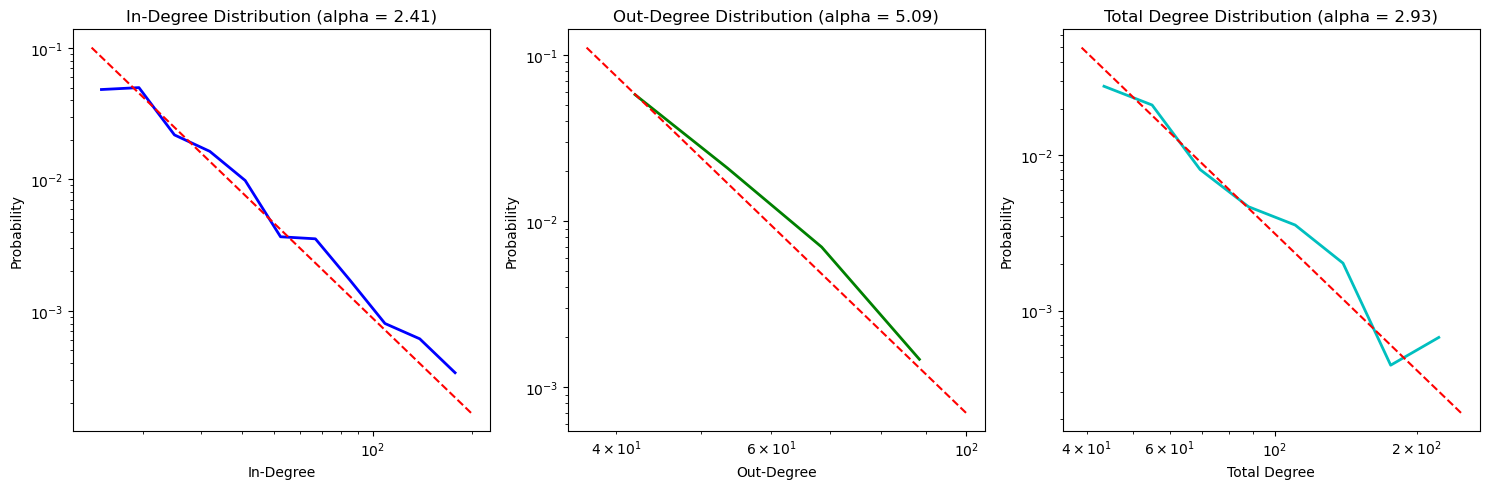

In [6]:


# Step 1: Extract in-degree, out-degree, and total-degree distributions
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
total_degrees = [G.degree(n) for n in G.nodes()]  # Combined degree

# Step 2: Fit power-law to each distribution
in_fit = powerlaw.Fit(in_degrees)
out_fit = powerlaw.Fit(out_degrees)
total_fit = powerlaw.Fit(total_degrees)

# Step 3: Access the alpha values
alpha_in = in_fit.alpha
alpha_out = out_fit.alpha
alpha_total = total_fit.alpha

print(f"Power-law exponent for in-degree: {alpha_in}")
print(f"Power-law exponent for out-degree: {alpha_out}")
print(f"Power-law exponent for total degree: {alpha_total}")

# Optional: Plot the degree distributions with power-law fit
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
in_fit.plot_pdf(color='b', linewidth=2)
in_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"In-Degree Distribution (alpha = {alpha_in:.2f})")
plt.xlabel("In-Degree")
plt.ylabel("Probability")

plt.subplot(1, 3, 2)
out_fit.plot_pdf(color='g', linewidth=2)
out_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"Out-Degree Distribution (alpha = {alpha_out:.2f})")
plt.xlabel("Out-Degree")
plt.ylabel("Probability")

plt.subplot(1, 3, 3)
total_fit.plot_pdf(color='c', linewidth=2)
total_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"Total Degree Distribution (alpha = {alpha_total:.2f})")
plt.xlabel("Total Degree")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()


### Conclusion:

The power-law exponents for the network indicate a **scale-free structure**, but with varying characteristics for in-degree, out-degree, and total degree distributions:

- **In-Degree (α = 2.41)**: This suggests that a few nodes in the network act as **hubs**, receiving many incoming links (e.g., references, mentions), while most nodes receive far fewer. This is typical of networks where a small number of entities are highly influential or authoritative.
  
- **Out-Degree (α = 5.09)**: A high exponent for out-degree indicates that most nodes link to only a few other nodes, with very few nodes having a high number of outgoing links. This suggests that few nodes actively contribute or reference many others, while most are more passive in linking.

- **Total Degree (α = 2.93)**: The total-degree exponent shows a balance between in- and out-links. The network overall still exhibits a **scale-free nature**, with a few nodes dominating connections, but not to the same extreme as out-degree alone.

In summary, the network is scale-free, with **central hubs** receiving most attention, while the activity of linking to many others is less common.

### When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?

the in-degree distribution indicated that most performers are referenced by a small number of others, with a few central hubs receiving many references. This is confirmed by the in-degree power-law exponent (α = 2.41), which reflects the presence of highly influential performers in the network.

Similarly, the out-degree distribution last week showed that most performers reference only a few others, but a small number of performers reference many others, acting as collaborative hubs. This is consistent with the higher out-degree exponent (α = 5.09), highlighting that few performers link to many others.

Both analyses support the same conclusion: the network exhibits a scale-free structure, with a few central hubs dominating the connectivity.